(50, 50) (50, 50) (50, 50)


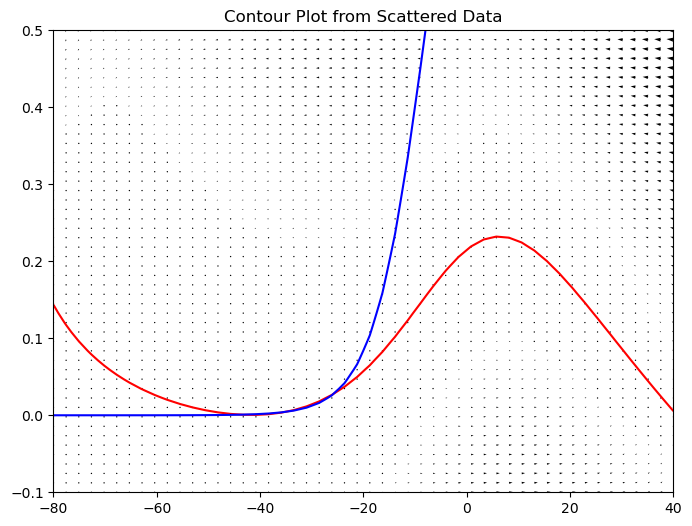

In [32]:
import numpy as np
import matplotlib.pyplot as plt
xx, yy = np.meshgrid(np.linspace(-80, 40, 50), np.linspace(-0.1, 0.5, 50))
coords = np.c_[xx.ravel(), yy.ravel()]
def minf(V, bm, cm):
    return 0.5 * (1 + np.tanh((V - bm) / cm))

def winf(V, bw, cw):
    return 0.5 * (1 + np.tanh((V - bw) / cw))

def tauw(V, bw, cw):
    return 1 / np.cosh((V - bw) / (2 * cw))

def hodgkinHuxley(t, x, p):
    # Unpack parameters
    C, gfast, gslow, gleak, ENa, EK, Eleak, bm, cm, bw, cw, phiw, Istim = p
    
    # State variables
    V= x[0]
    w = x[1]
    
    # Compute derivatives
    dVdt = (Istim - gfast * minf(V, bm, cm) * (V - ENa) - gslow * w * (V - EK) - gleak * (V - Eleak)) / C
    dwdt = phiw * (winf(V, bw, cw) - w) / tauw(V, bw, cw)
    
    return np.array([dVdt, dwdt])
par = np.array([
    2,      # C
    20,     # gfast
    20,     # gslow
    2,      # gleak
    50,     # ENa
    -100,   # EK
    -70,    # Eleak
    -1.2,   # bm
    18,     # cm
    -8,     # bw
    10,     # cw
    0.15,   # phiw
    37      # Istim
])
ode_rhs = np.array([hodgkinHuxley(0, coord, par) for coord in coords])
v_dot = ode_rhs[:, 0].reshape(xx.shape)
w_dot = ode_rhs[:, 1].reshape(xx.shape)
print(xx.shape,yy.shape,v_dot.shape)
plt.figure(figsize=(8, 6))
contour = plt.contour(xx,yy, v_dot, levels=[0],colors ='r')
plt.contour(xx,yy,w_dot,levels=[0],colors ='b')
plt.quiver(xx, yy, v_dot, w_dot, angles='xy', scale_units='xy', scale=500, color='k')
plt.title("Contour Plot from Scattered Data")

plt.show()